In [1]:
# Membaca data
import pandas as pd
stresslevel = pd.read_csv('SaYoPillow.csv')

In [2]:
# Melihat informasi dalam data set
stresslevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


columns 
['snoring_rate (sr)', 'respiration_rate (rr)', 'temperature' (t), 'limb_move (lm)', 'blood_oxygen (bo)', 'eye_move (em)', 'sleep_hour (sr.1)', 'heart_rate (hr)']
sl = stress_level

In [3]:
# Menampilkan 10 baris pertama
stresslevel.head(10)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44,1
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76,1


In [4]:
# Memisahkan atribut dengan label, yang dimana x adalah atribut dan y adalah label
X = stresslevel[['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr']]
y = stresslevel['sl']


# Membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
from sklearn.naive_bayes import GaussianNB

# Membuat model naive bayes
model_NB = GaussianNB()

# Melatih model naive bayes
model_NB.fit(X_train, y_train)

GaussianNB()

In [16]:
# Evaluasi model

from sklearn.metrics import classification_report, accuracy_score

# Membuat prediksi model naive bayes
predict_NB = model_NB.predict(X_test)

# Mencetak laporan klasifikasi seperti presisi, recall, f1-score, dan akurasi
print(classification_report(y_test, predict_NB))

y_pred = model_NB.predict(X_test)
accuracy_score =round(accuracy_score(y_pred, y_test), 3)
print('Accuracy: ',accuracy_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Accuracy:  1.0


In [17]:
# Melihat class names
print(model_NB.classes_)

[0 1 2 3 4]


In [18]:
#Prediksi model
print(model_NB.predict([[55.00, 19.00, 95.00, 9.00, 94.00, 82.00, 6.00, 57.00]])[0])

1


C:\Users\My ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [19]:
print(model_NB.predict([[93.00, 25.00, 91.00, 16.00, 89.00, 99.00, 1.00, 74.00]])[0])

3


C:\Users\My ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [24]:
# Mencetak confunsion matrix
from sklearn.metrics import confusion_matrix

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[25  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 27]]


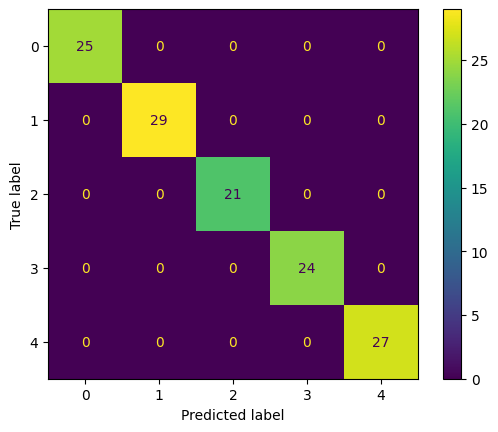

In [33]:
# Melihat visualisasi dari confusion matrix
# Confusion matrix ialah tabel yang menunjukkan jumlah prediksi yang benar dan yang salah dari model klasifikasi pada setiap kelas.

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, predict_NB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()